<a href="https://colab.research.google.com/github/kevinkemps/hw3_image_classification/blob/main/hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I trained all of the models in the notebook, but will note the discussions/answers with #answers so you can search the notebook

Part a:
This section is just setting up a base model using keras (code based on sample keras notebook code). You can skip to section a.i for the parameter tuning

In [26]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import keras
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from skimage.color import rgb2gray
from keras.utils import to_categorical
import time
from keras import backend as K


In [27]:
# load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# convert to grayscale images
X_train = rgb2gray(X_train)
X_test = rgb2gray(X_test)

# Preprocessing: Normalize the images.
train_images = X_train#(X_train / 255)
test_images = X_test#(X_test / 255)

# prompt: split the training data and labels into 1/5 validation and 4/5 training at random
train_images, val_images, train_labels, val_labels = train_test_split(train_images, y_train, test_size=1/5, random_state=42)

In [28]:
model = Sequential([Dense(64, input_shape=(1024,), activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                65600     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

In [30]:
#flatten all groups of images
flatten_train_images = train_images.reshape((-1, 32*32))
flatten_val_images = val_images.reshape((-1, 32*32))
flatten_test_images = test_images.reshape((-1, 32*32))

In [31]:
print("Train image shape: ", train_images.shape, "Flattened image shape: ", flatten_train_images.shape)

Train image shape:  (40000, 32, 32) Flattened image shape:  (40000, 1024)


a)

Epoch 1/10
157/157 [==============================] - 2s 5ms/step - loss: 2.2674 - accuracy: 0.1446
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 2.2052 - accuracy: 0.1979
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 2.1550 - accuracy: 0.2225
Epoch 4/10
157/157 [==============================] - 1s 3ms/step - loss: 2.1150 - accuracy: 0.2335
Epoch 5/10
157/157 [==============================] - 1s 3ms/step - loss: 2.0857 - accuracy: 0.2445
Epoch 6/10
157/157 [==============================] - 1s 4ms/step - loss: 2.0637 - accuracy: 0.2596
Epoch 7/10
157/157 [==============================] - 1s 4ms/step - loss: 2.0472 - accuracy: 0.2663
Epoch 8/10
157/157 [==============================] - 1s 4ms/step - loss: 2.0327 - accuracy: 0.2746
Epoch 9/10
157/157 [==============================] - 1s 4ms/step - loss: 2.0208 - accuracy: 0.2793
Epoch 10/10
157/157 [==============================] - 1s 4ms/step - loss: 2.0108 - accuracy: 0.2854

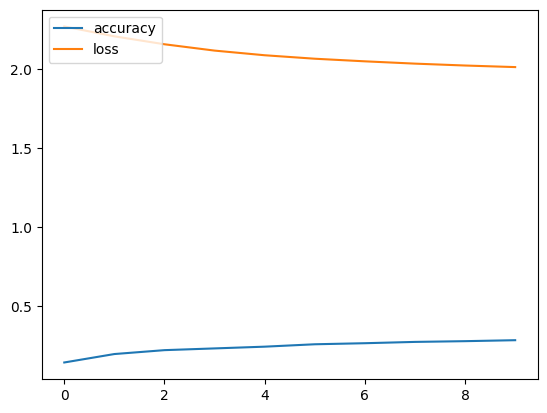

In [ ]:
history = model.fit(flatten_train_images, to_categorical(train_labels), epochs=10, batch_size=256,)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')

In [ ]:

# Evaluate your model's performance on the test data
performance = model.evaluate(flatten_test_images, to_categorical(y_test))
print("Accuracy on Test samples: {0}".format(performance[1]))

313/313 [==============================] - 1s 2ms/step - loss: 2.0215 - accuracy: 0.2839
Accuracy on Test samples: 0.2838999927043915


(a.i) Hyper Parameter tuning

In [12]:
'''
Helper functions to build, train, and test the model.

'''
def build_model(nodes=[128, 64, 10], activation='relu', optimizer='sgd', lr=.01, dropout = .2):
  layer_list = []

  for layer in range(len(nodes)):
      if type(activation) == list:
        activation = activation[layer]
      if layer == 0:
        layer_list.append(Dense(nodes[layer], input_shape=(1024,), activation=activation))
      elif layer < len(nodes) -1:
        layer_list.append(Dense(nodes[layer], activation=activation))
        layer_list.append(Dropout(dropout))
      else:
        layer_list.append(Dense(nodes[layer], activation=activation))
  model = Sequential(layer_list)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'],)
  K.set_value(model.optimizer.learning_rate, lr)
  print(model.summary())
  return model


def train_model(model, train_X, train_labels, epochs=10, batch_size=256):
  start = time.time()
  history = model.fit(flatten_train_images, to_categorical(train_labels), epochs=epochs, batch_size=256,)
  print(f"The model took {time.time() - start} seconds to train")
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['loss'])
  plt.legend(['accuracy', 'loss'], loc='upper left')


def test_model(model, test_X, test_labels):
  # Evaluate your model's performance on the test data
  performance = model.evaluate(test_X, to_categorical(test_labels))
  print("Accuracy on Test/Validation samples: {0}".format(performance[1]))

Experiment on the validation set with different FNN hyper-parameters, e.g.
layers, nodes per layer, activation function, dropout, weight regularization, etc.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               131200    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
Total params: 140106 (547.29 KB)
Trainable params: 140106 (547.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/1

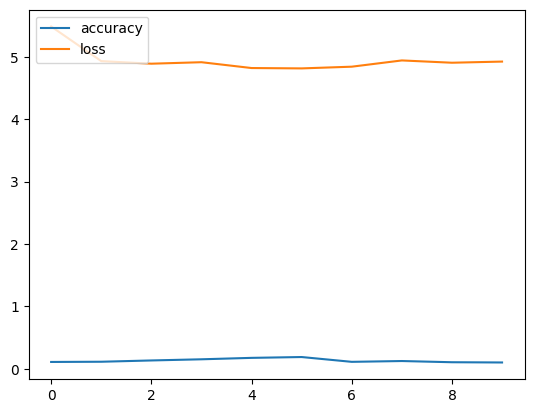

In [11]:
model = build_model()
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 500)               512500    
                                                                 
 dense_7 (Dense)             (None, 250)               125250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_8 (Dense)             (None, 125)               31375     
                                                                 
 dropout_3 (Dropout)         (None, 125)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1260      
                                                                 
 dropout_4 (Dropout)         (None, 10)               

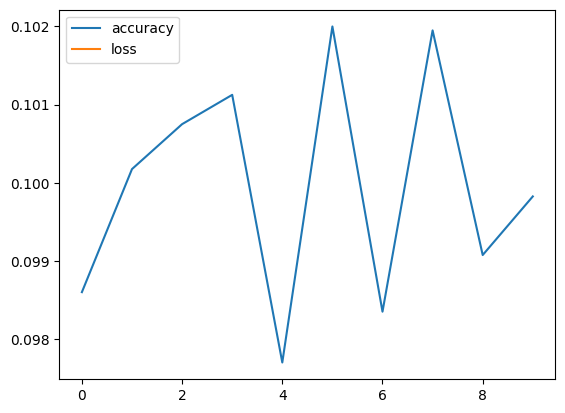

In [12]:
model = build_model(nodes=[500, 250, 125, 10], activation=['relu', 'relu', 'relu', 'sigmoid'])
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 800)               820000    
                                                                 
 dense_11 (Dense)            (None, 500)               400500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_12 (Dense)            (None, 250)               125250    
                                                                 
 dropout_6 (Dropout)         (None, 250)               0         
                                                                 
 dense_13 (Dense)            (None, 125)               31375     
                                                                 
 dropout_7 (Dropout)         (None, 125)              

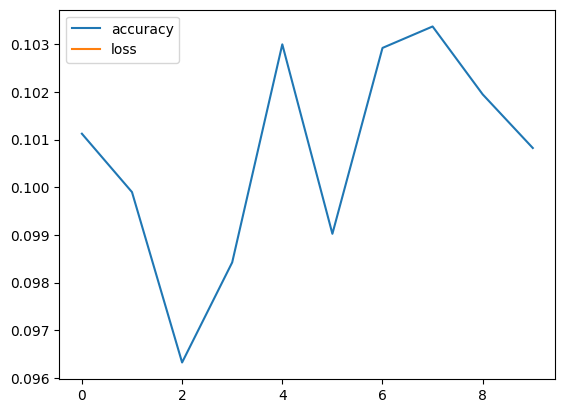

In [13]:
model = build_model(nodes=[800 ,500, 250, 125, 10], activation=['relu', 'relu', 'relu', 'relu', 'relu'])
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 800)               820000    
                                                                 
 dense_16 (Dense)            (None, 700)               560700    
                                                                 
 dropout_9 (Dropout)         (None, 700)               0         
                                                                 
 dense_17 (Dense)            (None, 600)               420600    
                                                                 
 dropout_10 (Dropout)        (None, 600)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               300500    
                                                                 
 dropout_11 (Dropout)        (None, 500)              

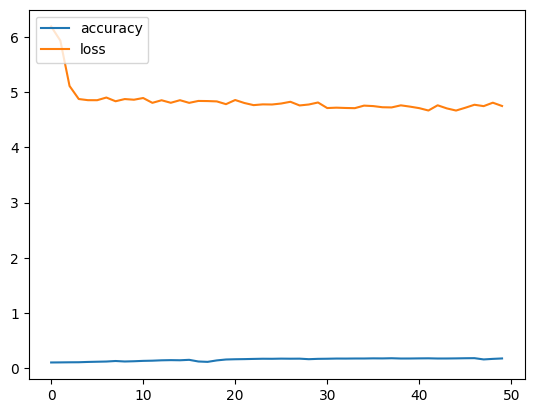

In [14]:
model = build_model(nodes=[800, 700, 600, 500, 400, 300, 250, 125, 50, 25, 10])
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, epochs=50)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 800)               820000    
                                                                 
 dense_27 (Dense)            (None, 700)               560700    
                                                                 
 dense_28 (Dense)            (None, 600)               420600    
                                                                 
 dense_29 (Dense)            (None, 500)               300500    
                                                                 
 dense_30 (Dense)            (None, 400)               200400    
                                                                 
 dense_31 (Dense)            (None, 300)               120300    
                                                                 
 dense_32 (Dense)            (None, 250)              

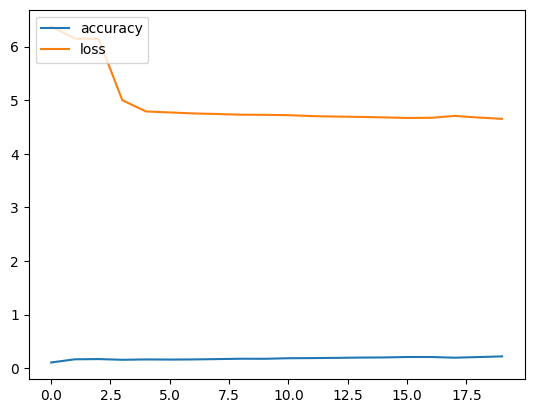

In [ ]:
model = build_model(nodes=[800, 700, 600, 500, 400, 300, 250, 125, 50, 25, 10], optimizer='adam', lr=.001)
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, epochs=20)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 800)               820000    
                                                                 
 dense_38 (Dense)            (None, 700)               560700    
                                                                 
 dense_39 (Dense)            (None, 600)               420600    
                                                                 
 dense_40 (Dense)            (None, 500)               300500    
                                                                 
 dense_41 (Dense)            (None, 400)               200400    
                                                                 
 dense_42 (Dense)            (None, 300)               120300    
                                                                 
 dense_43 (Dense)            (None, 250)              

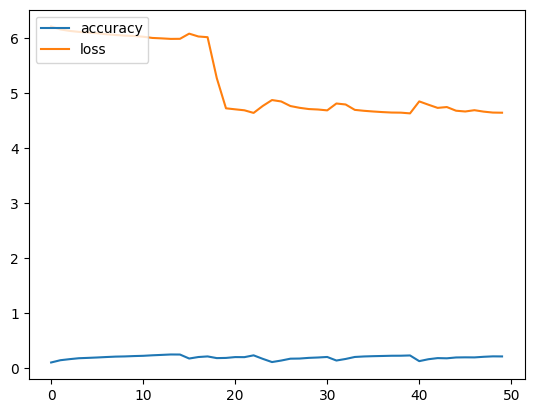

In [ ]:
model = build_model(nodes=[800, 700, 600, 500, 400, 300, 250, 125, 50, 25, 10], optimizer='adam', lr=.001)
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, epochs=50)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 800)               820000    
                                                                 
 dense_49 (Dense)            (None, 500)               400500    
                                                                 
 dense_50 (Dense)            (None, 250)               125250    
                                                                 
 dense_51 (Dense)            (None, 125)               31375     
                                                                 
 dense_52 (Dense)            (None, 10)                1260      
                                                                 
Total params: 1378385 (5.26 MB)
Trainable params: 1378385 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/30


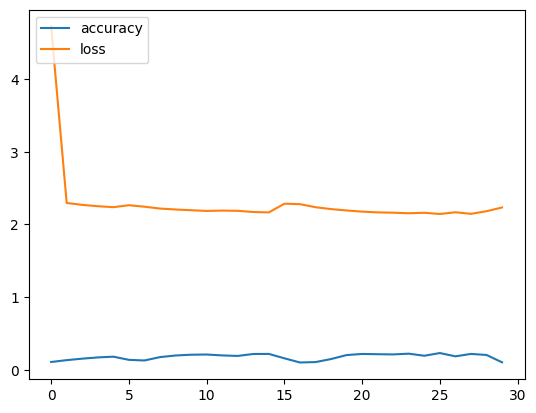

In [ ]:
model = build_model(nodes=[800 ,500, 250, 125, 10], lr=.0001)
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, epochs=30)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 600)               615000    
                                                                 
 dense_54 (Dense)            (None, 500)               300500    
                                                                 
 dense_55 (Dense)            (None, 250)               125250    
                                                                 
 dense_56 (Dense)            (None, 125)               31375     
                                                                 
 dense_57 (Dense)            (None, 64)                8064      
                                                                 
 dense_58 (Dense)            (None, 10)                650       
                                                                 
Total params: 1080839 (4.12 MB)
Trainable params: 1080

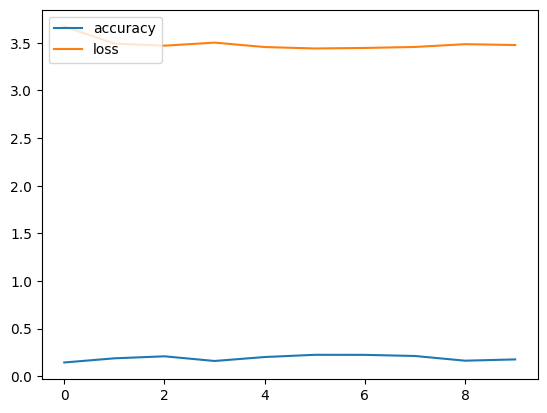

In [ ]:
model = build_model(nodes=[600, 500, 250, 125, 64, 10], lr=.001)
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 250)               256250    
                                                                 
 dense_60 (Dense)            (None, 125)               31375     
                                                                 
 dense_61 (Dense)            (None, 10)                1260      
                                                                 
Total params: 288885 (1.10 MB)
Trainable params: 288885 (1.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
157/157 [==============================] - 1s 4ms/step - loss: 5.5890 - accuracy: 0.1195
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 4.8429 - accuracy: 0.1624
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 4.8

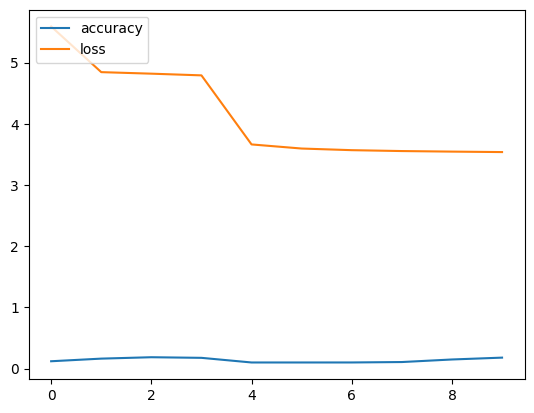

In [ ]:
model = build_model(nodes=[250, 125, 10], activation=['relu', 'relu', 'relu'], lr=.001)
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 80)                82000     
                                                                 
 dense_63 (Dense)            (None, 30)                2430      
                                                                 
 dense_64 (Dense)            (None, 10)                310       
                                                                 
Total params: 84740 (331.02 KB)
Trainable params: 84740 (331.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
157/157 [==============================] - 1s 4ms/step - loss: 7.2626 - accuracy: 0.1007
Epoch 2/10
157/157 [==============================] - 1s 3ms/step - loss: 6.2208 - accuracy: 0.0995
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 

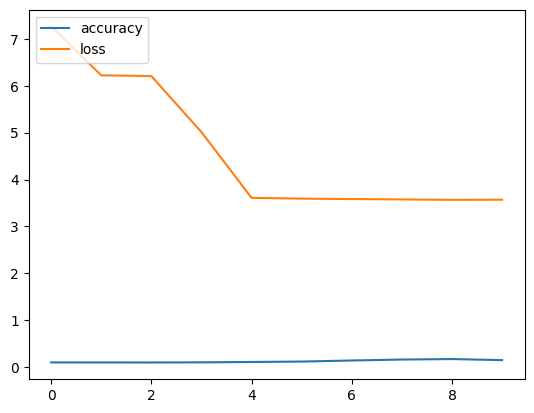

In [ ]:
model = build_model(nodes=[80, 30, 10], activation=['relu', 'softmax', 'relu'], lr=.001)
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 250)               256250    
                                                                 
 dense_27 (Dense)            (None, 125)               31375     
                                                                 
 dropout_19 (Dropout)        (None, 125)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8064      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
 dropout_21 (Dropout)        (None, 10)               

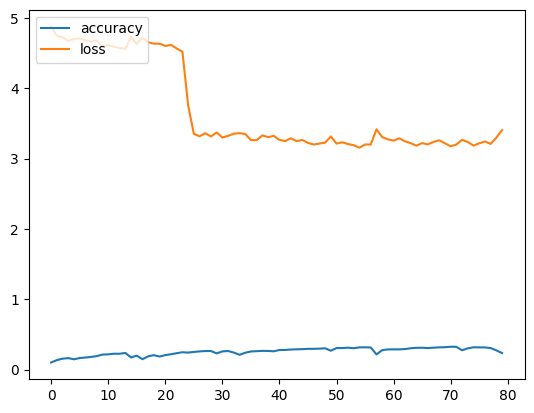

In [16]:
model = build_model(nodes=[250, 125, 64, 10], activation=['relu', 'relu', 'relu', 'softmax'], lr=.01, optimizer='adam', dropout=.1)
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, batch_size=512, epochs=80)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

In [18]:
test_model(model=model, test_X=flatten_test_images, test_labels=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9662 - accuracy: 0.2908
Accuracy on Test/Validation samples: 0.290800005197525


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 250)               256250    
                                                                 
 dense_26 (Dense)            (None, 125)               31375     
                                                                 
 dense_27 (Dense)            (None, 64)                8064      
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 296339 (1.13 MB)
Trainable params: 296339 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/160
157/157 [==============================] - 3s 4ms/step - loss: 3.6306 - accuracy: 0.1181
Epoch 2/160
157/157 [=======================

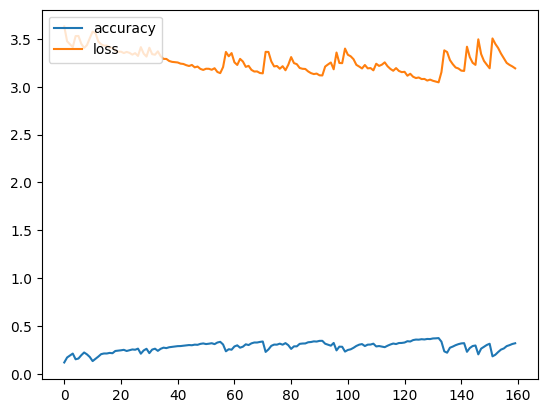

In [ ]:
model = build_model(nodes=[250, 125, 64, 10], activation=['relu', 'relu', 'relu', 'softmax'], lr=.01, optimizer='adam')
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, batch_size=512, epochs=160)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                16448     
                                                                 
 dropout_24 (Dropout)        (None, 64)               

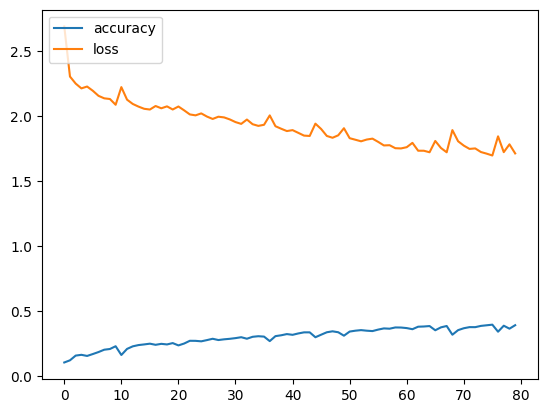

In [19]:
model = build_model(nodes=[1024, 512, 256, 64, 10], lr=.001, optimizer='adam')
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, batch_size=512, epochs=80)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

#Answer

In [20]:
#we have a winner...
test_model(model=model, test_X=flatten_test_images, test_labels=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7272 - accuracy: 0.3905
Accuracy on Test/Validation samples: 0.390500009059906


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_227 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_228 (Dense)           (None, 512)               524800    
                                                                 
 dense_229 (Dense)           (None, 256)               131328    
                                                                 
 dense_230 (Dense)           (None, 64)                16448     
                                                                 
 dense_231 (Dense)           (None, 10)                650       
                                                                 
Total params: 1722826 (6.57 MB)
Trainable params: 1722826 (6.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80

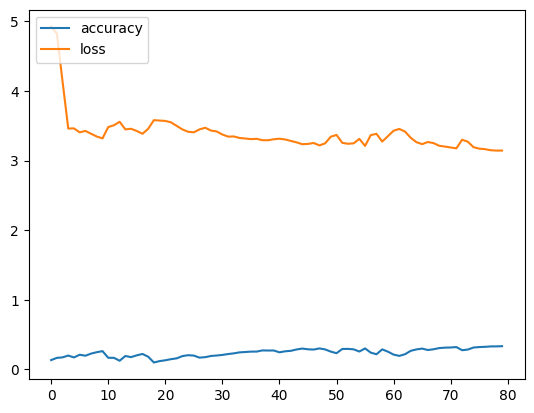

In [ ]:
model = build_model(nodes=[1024, 512, 256, 64, 10], lr=.001, optimizer='adam')
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, batch_size=800, epochs=80)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

In [ ]:
test_model(model=model, test_X=flatten_test_images, test_labels=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.1810 - accuracy: 0.3310
Accuracy on Test/Validation samples: 0.3310000002384186


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_232 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_233 (Dense)           (None, 512)               524800    
                                                                 
 dense_234 (Dense)           (None, 256)               131328    
                                                                 
 dense_235 (Dense)           (None, 64)                16448     
                                                                 
 dense_236 (Dense)           (None, 10)                650       
                                                                 
Total params: 1722826 (6.57 MB)
Trainable params: 1722826 (6.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80

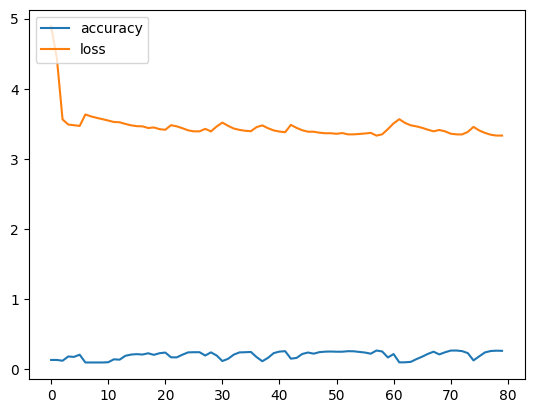

In [ ]:
model = build_model(nodes=[1024, 512, 256, 64, 10], lr=.001, optimizer='adagrad')
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, batch_size=800, epochs=80)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_241 (Dense)           (None, 512)               524800    
                                                                 
 dense_242 (Dense)           (None, 256)               131328    
                                                                 
 dense_243 (Dense)           (None, 64)                16448     
                                                                 
 dense_244 (Dense)           (None, 10)                650       
                                                                 
Total params: 673226 (2.57 MB)
Trainable params: 673226 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
157/157 [==============================] - 2s 4ms/step - loss: 4.8218 - accuracy: 0.1717
Epoch 2/80
157/157 [========================

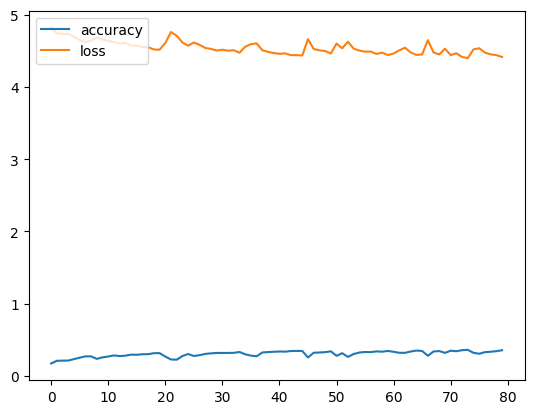

In [ ]:
model = build_model(nodes=[512, 256, 64, 10], lr=.001, optimizer='adam')
train_model(model=model, train_X=flatten_train_images, train_labels=train_labels, batch_size=256, epochs=80)
test_model(model=model, test_X=flatten_val_images, test_labels=val_labels)

#Answer
(a.**ii**)
Test model from above. I found adding the dropout layer seems to have increased my prediction accuracy, not just preventing overtraining on the test set. I suspect this is because of how the model is trained in Keras.

In [45]:
test_model(model=model, test_X=flatten_test_images, test_labels=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7272 - accuracy: 0.3905
Accuracy on Test/Validation samples: 0.390500009059906


In [43]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model.predict(flatten_test_images)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, np.argmax(y_prediction, axis=1))

313/313 [==============================] - 1s 3ms/step


#Answer

Confusion Matrix

In [44]:
result

array([[430,  42, 140,  18,  40,  17,  51,  61, 162,  39],
       [ 52, 464,  17,  29,  12,  23,  54,  46, 136, 167],
       [133,  27, 353,  74,  53,  85, 123,  90,  41,  21],
       [ 71,  26,  88, 173,  67, 205, 162,  98,  41,  69],
       [168,  35, 196,  31, 201,  62, 107, 131,  52,  17],
       [ 63,  14, 124, 131,  41, 342, 115, 104,  39,  27],
       [ 77,  51, 100,  51,  56,  81, 441,  67,  43,  33],
       [ 85,  23,  78,  50,  44,  61,  42, 523,  37,  57],
       [140,  79,  45,  19,  15,  43,  26,  47, 524,  62],
       [ 43, 183,  29,  34,   5,  33,  50,  66, 103, 454]])

(b)

In [40]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 2304)              0         
                                                                 
 dense_29 (Dense)            (None, 32)              

(b.i.)

In [49]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
start = time.time()
# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(32, activation='relu'), Dropout(.2), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=40, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))

print("Accuracy on Test samples: {0}".format(performance[1]))

print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_38 (Dense)            (None, 32)               

In [50]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(4,4)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(4,4)), Flatten(),]
classifier = [Dense(64, activation='relu'), Dropout(.1), Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 64)               

In [51]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

start = time.time()
# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=2, activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(4,4)),
            Conv2D(64, kernel_size=2, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

history = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 31, 31, 32)        160       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 6, 6, 64)          8256      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_43 (Dense)            (None, 64)              

In [54]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
import time
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=2, activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(3,3)),
            Conv2D(64, kernel_size=2, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 31, 31, 32)        160       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 10, 10, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 9, 9, 64)          8256      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 dense_49 (Dense)            (None, 64)              

In [70]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, padding="same", activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=4, activation='relu', padding="same"),
            MaxPooling2D(pool_size=(2, 2)), Flatten(),]
classifier = [Dense(32, activation='relu'), Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 16, 16, 64)        32832     
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_32 (Flatten)        (None, 4096)              0         
                                                                 
 dense_88 (Dense)            (None, 32)              

In [77]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(16, (7, 7), strides=(2, 2), padding="same", activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(32, (3, 3), padding="same", activation="relu"),
             MaxPooling2D(pool_size=(2, 2)),
            Conv2D(32, (1, 1), strides=(2, 2), padding="same"), Flatten()]
classifier = [Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 16, 16, 16)        800       
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 2, 2, 32)          1056      
                                                                 
 flatten_34 (Flatten)        (None, 128)             

In [79]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, (5, 5), strides=(2, 2), padding="same", activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), padding="same", activation="relu"),
             MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (1, 1), strides=(2, 2), padding="same"), Flatten()]
classifier = [Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 16, 16, 32)        832       
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_79 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 2, 2, 128)         8320      
                                                                 
 flatten_36 (Flatten)        (None, 512)             

In [80]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, (5, 5), strides=(2, 2), padding="same", activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), padding="same", activation="relu"),
             MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (1, 1), strides=(2, 2), padding="same"), Flatten()]
classifier = [Dense(64, activation='relu'), Dropout(.1), Dense(32, activation='relu'), Dropout(.1), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

history = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 16, 16, 32)        832       
                                                                 
 max_pooling2d_67 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_68 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_83 (Conv2D)          (None, 2, 2, 128)         8320      
                                                                 
 flatten_37 (Flatten)        (None, 512)             

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 16, 16, 32)        832       
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_85 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_86 (Conv2D)          (None, 2, 2, 128)         8320      
                                                                 
 flatten_38 (Flatten)        (None, 512)             

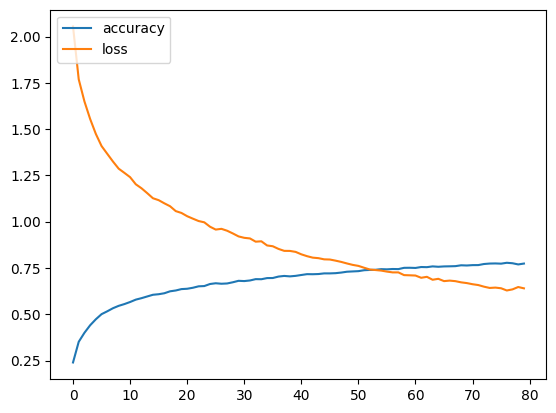

In [81]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, (5, 5), strides=(2, 2), padding="same", activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), padding="same", activation="relu"),
             MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (1, 1), strides=(2, 2), padding="same"), Flatten()]
classifier = [Dense(64, activation='relu'), Dropout(.1), Dense(32, activation='relu'), Dropout(.1), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

history = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 16, 16, 32)        832       
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_72 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_89 (Conv2D)          (None, 2, 2, 128)         8320      
                                                                 
 max_pooling2d_73 (MaxPooli  (None, 1, 1, 128)       

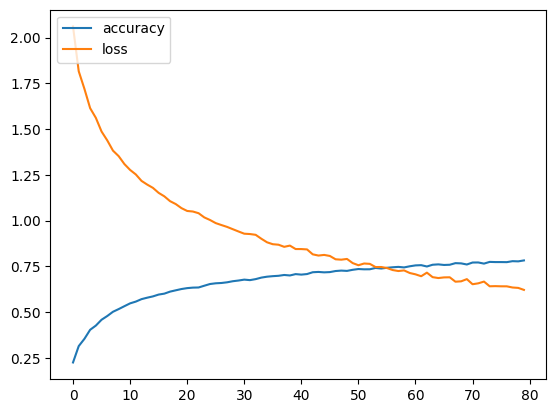

In [82]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, (5, 5), strides=(2, 2), padding="same", activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), padding="same", activation="relu"),
             MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (1, 1), strides=(2, 2), padding="same"),
                   MaxPooling2D(pool_size=(2, 2)),
            Conv2D(256, (1, 1), strides=(2, 2), padding="same"), Flatten()]
classifier = [Dense(64, activation='relu'), Dropout(.1), Dense(32, activation='relu'), Dropout(.1), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

history = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 16, 16, 32)        832       
                                                                 
 max_pooling2d_74 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_92 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_93 (Conv2D)          (None, 2, 2, 128)         8320      
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 1, 1, 128)       

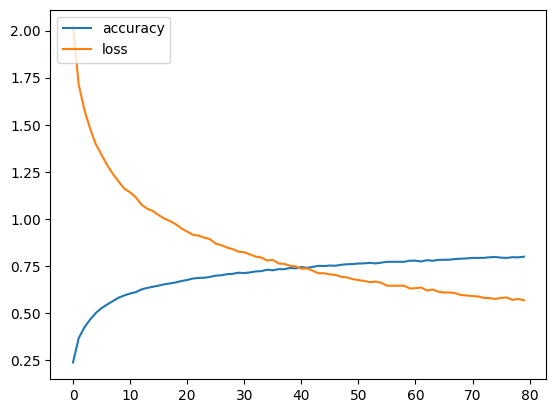

In [83]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, (5, 5), strides=(2, 2), padding="same", activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), padding="same", activation="relu"),
             MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (1, 1), strides=(2, 2), padding="same"),
                   MaxPooling2D(pool_size=(2, 2)),
            Conv2D(256, (1, 1), strides=(2, 2), padding="same"), Flatten()]
classifier = [Dense(64, activation='relu'), Dropout(.1), Dense(32, activation='relu'), Dropout(.1), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

history = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=128,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 16, 16, 32)        832       
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_77 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_96 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_78 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                     

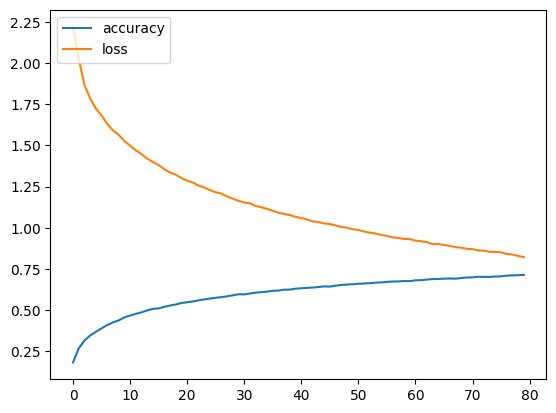

In [84]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, (5, 5), strides=(2, 2), padding="same", activation='relu', input_shape=(32,32,1)),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), padding="same", activation="relu"),
             MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (1, 1), strides=(2, 2), padding="same"),
                   MaxPooling2D(pool_size=(2, 2)),
            Conv2D(256, (1, 1), strides=(2, 2), padding="same"), Flatten()]
classifier = [Dense(64, activation='relu'), Dropout(.1), Dense(32, activation='relu'), Dropout(.1), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

history = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=128,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 16, 16, 32)        832       
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_80 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_100 (Conv2D)         (None, 8, 8, 64)          18496     
                                                                 
 spatial_dropout2d (Spatial  (None, 8, 8, 64)          0         
 Dropout2D)                                                      
                                                     

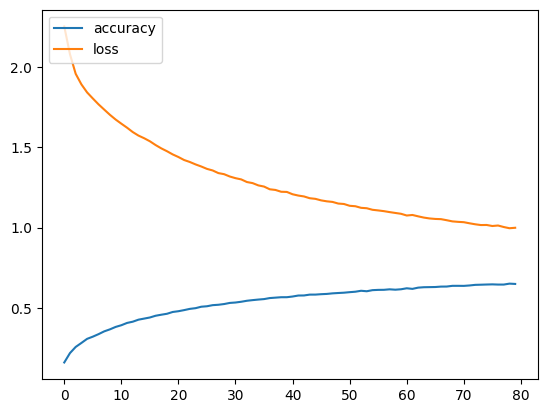

In [85]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, SpatialDropout2D
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, (5, 5), strides=(2, 2), padding="same", activation='relu', input_shape=(32,32,1)),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), padding="same", activation="relu"),
            SpatialDropout2D(.1),
             MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (1, 1), strides=(2, 2), padding="same"),
                   MaxPooling2D(pool_size=(2, 2)),
            Conv2D(256, (1, 1), strides=(2, 2), padding="same"), Flatten()]
classifier = [Dense(64, activation='relu'), Dropout(.1), Dense(32, activation='relu'), Dropout(.1), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

history = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=128,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        832       
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 spatial_dropout2d_1 (Spati  (None, 8, 8, 64)          0         
 alDropout2D)                                                    
                                                        

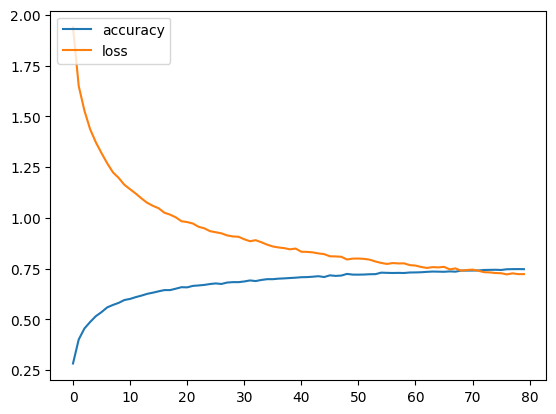

In [5]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, SpatialDropout2D
import time
start = time.time()

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, (5, 5), strides=(2, 2), padding="same", activation='relu', input_shape=(32,32,1)),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), padding="same", activation="relu"),
            SpatialDropout2D(.1),
             MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (1, 1), strides=(2, 2), padding="same"),
                   MaxPooling2D(pool_size=(2, 2)),
            Conv2D(256, (1, 1), strides=(2, 2), padding="same"), Flatten()]
classifier = [Dense(64, activation='relu'), Dropout(.1), Dense(32, activation='relu'), Dropout(.1), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = val_images.reshape(10000,32,32,1)

history = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=80, batch_size=128,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(val_labels))


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')

print("Accuracy on Test samples: {0}".format(performance[1]))
print(f'it took {time.time() - start} seconds to run this model')

#Answer
(b.ii)

In [6]:
test_images_3d = test_images.reshape(10000,32,32,1)

performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))

313/313 [==============================] - 4s 12ms/step - loss: 1.2415 - accuracy: 0.6155


The accuracy is higher than the FNN, 61 vs 40%. The number of parameters is about 80,000 compared to 524,000 in an FNN.

Oh lordy the training time was way too long. I ran out of compute resources...

(c)

In [32]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,1)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(40000,32,32,1)
test_images_3d = test_images.reshape(10000,32,32,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(y_test))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_24 (Dense)            (None, 32)              

(60000, 28, 28)
Visualize a sample
2
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_24 (Dense

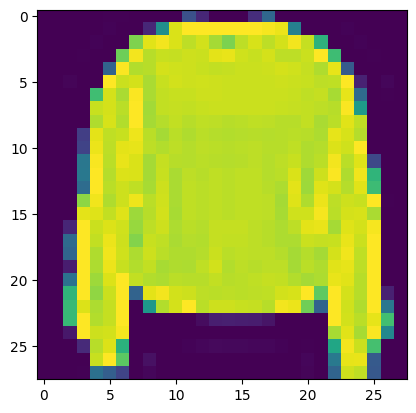

In [33]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

(train_fashion_images, train_fashion_labels), (test_fashion_images, test_fashion_labels) = fashion_mnist.load_data()
print(train_fashion_images.shape)

train_fashion_images = (train_fashion_images / 255)
test_fashion_images = (test_fashion_images / 255)
print("Visualize a sample")
print(train_fashion_labels[7])
_ = plt.imshow(train_fashion_images[7])


train_fashion_images_3d = train_fashion_images.reshape(60000,28,28,1)
test_fashion_images_3d = test_fashion_images.reshape(10000,28,28,1)

print(cnn_model.summary())

for l in common_features:
  l.trainable = False

print(cnn_model.summary())

In [38]:
from keras.models import Model
from keras.layers import Input

# Define a fetaure extraction model that is shared for both mnist and fashion-mnist tasks
Base_feature_model = Sequential([Conv2D(32, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Flatten(), Dense(32, activation='relu'),])

Classifier_mnist = Sequential([Dense(10, activation='softmax')])
Classifier_fashion_mnist = Sequential([Dense(10, activation='softmax')])

# Instantiate a Tensor to feed Input (Input Layer)
mnist_input = Input(shape=(28,28,1))
fashion_mnist_input = Input(shape=(28,28,1))

# Call Base_feature_model over the mnist images
mnist_features = Base_feature_model(mnist_input)

# Call Base_feature_model over the fashion-mnist images
fashion_mnist_features = Base_feature_model(fashion_mnist_input)

# Call mnist_prediction layer over the mnist images
# mnist_prediction represents the predicted output for mnist dataset
mnist_prediction = Classifier_mnist(mnist_features)

# Call fashion_mnist_prediction layer over the mnist images
# fashion_mnist_prediction represents the predicted output for fashion-mnist dataset
fashion_mnist_prediction = Classifier_fashion_mnist(fashion_mnist_features)

# define model by calling Model(inputs, outputs) on the instance of input layers and output layers
joint_model = Model(inputs=[mnist_input, fashion_mnist_input],
                    outputs=[mnist_prediction, fashion_mnist_prediction])

print(joint_model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 sequential_13 (Sequential)  (None, 32)                   70048     ['input_3[0][0]',             
                                                                     'input_4[0][0]']             
                                                                                                  
 sequential_14 (Sequential)  (None, 10)                   330       ['sequential_13[0][0]'] 

#Answer

The combined fine tuned model is worse, though to be honest, I haven't made time to finish out running it with varied parameters and the explainability part